# 线性模型的特点

什么函数对数据是最佳的 ---最简单的模型即线性模型--随机猜测一个权重w--是一个搜索的过程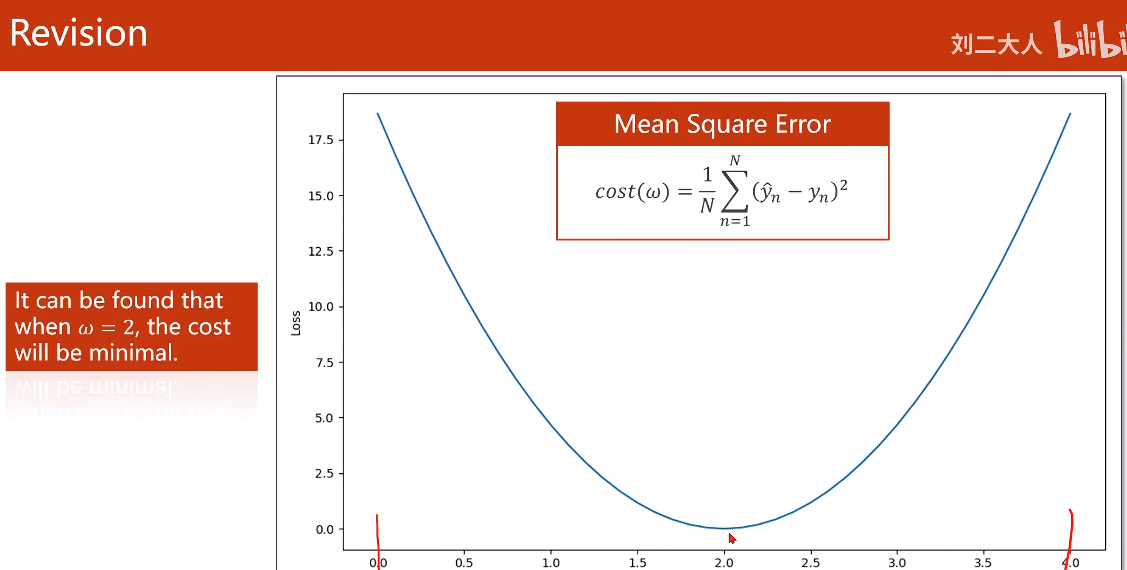

在真正的学习任务中--最终目标函数比较复杂且维度多

若有两个权重 -->若搜索的区间大（0-100）----则搜索就是一个立体图形 100^2

权重更多 则会判断的数据组合越多

可以进行分治搜索（在曲线十分光滑的情况下可以使用）

例如在0-4中搜索 可以只搜索16个点 找其中的最小值--在划分4份进行搜索--其他区间就不再访问

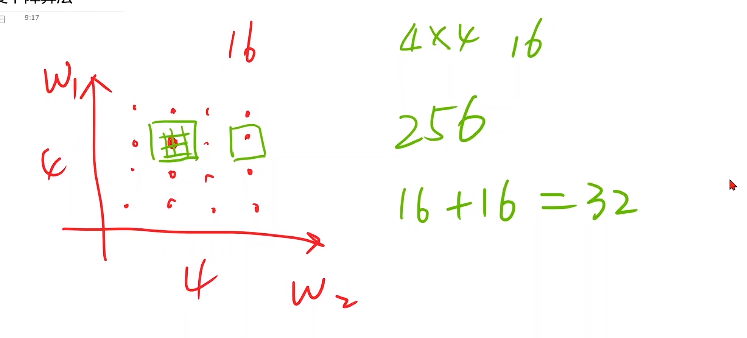

但这种情况也不好找到 无法找到最低点 则需要用梯度下降模型---找到最优值的算法
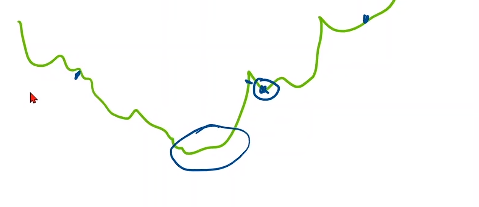

# 梯度下降算法 

1.有一个初始点w 要搜索最佳的权重
先进行求导看斜率-->看往哪边找下一个w

如果导数小于0则向这个方向找下一个w

下一个w =  (a为学习率)  这是一种贪心算法 （不一定能得到最优算法 但可以得到局部区域最优的结果）有可能无法到达最优点
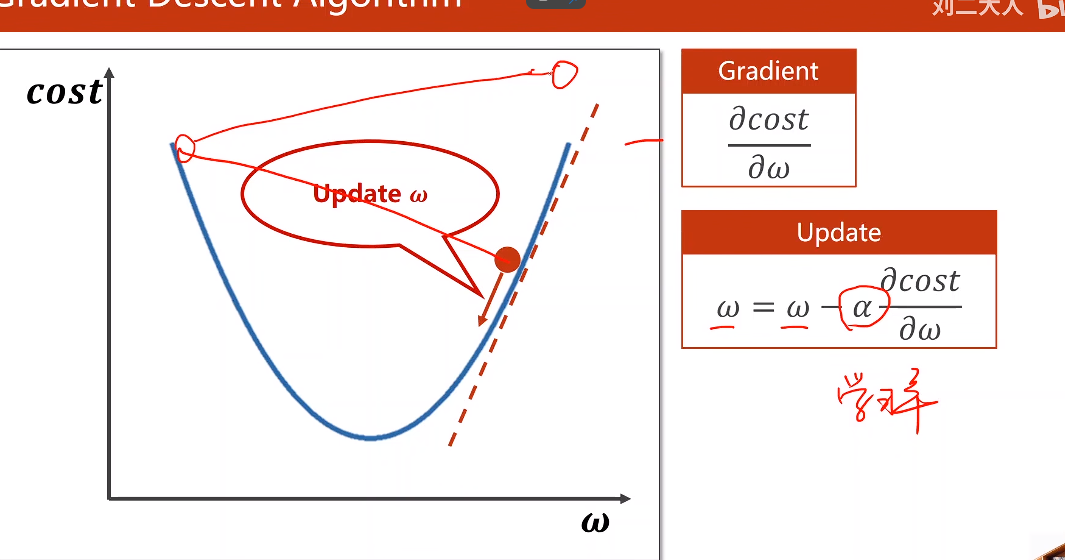

但是在深度学习中并没有太多的局部最优点 很难陷入到局部最优点 
但会有一种特殊的点 鞍点梯度为0 会没有办法继续迭代 最大的问题即是碰到鞍点的问题 
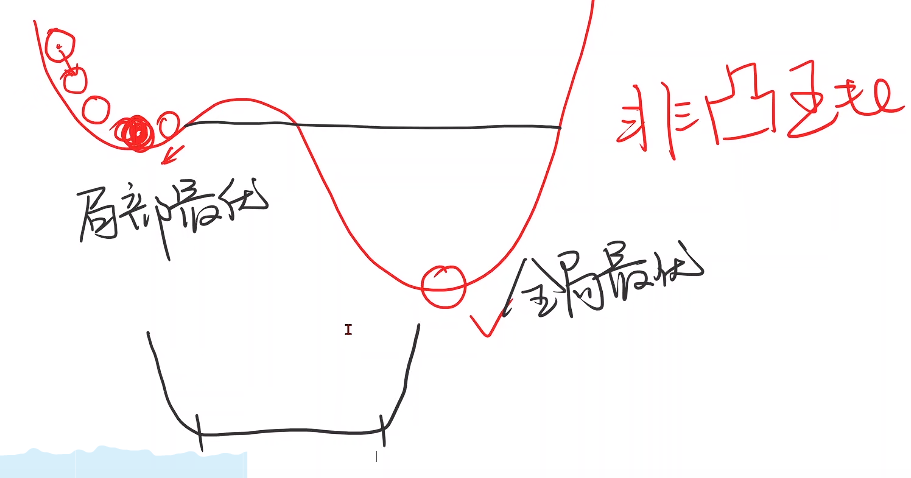

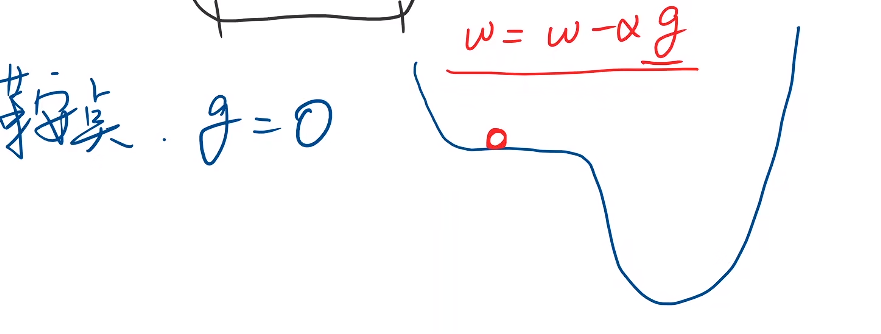

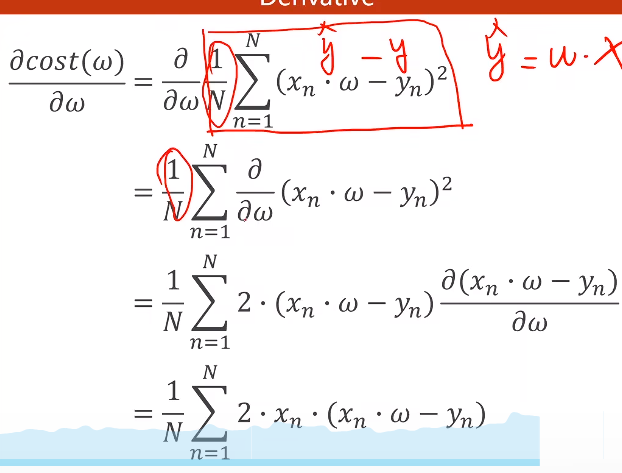

In [57]:
import matplotlib.pyplot as plt

In [58]:
x_data = [1.0,2.0,3.0]
y_data = [2.0,4.0,6.0]

In [59]:
w = 1.0#猜测的初始权重w

In [60]:
def forward(x):
    return x * w

In [61]:
def cost(xs,ys):
    cost = 0
    for x,y in zip(xs,ys):
        y_pred = forward(x)
        cost = (y_pred - y)*(y_pred - y)
    return cost/len(xs)

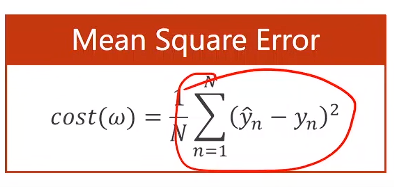

In [62]:
def gradient(xs,ys):
    grad = 0
    for x,y in zip(xs,ys):
        grad = grad + 2*x*(x*w - y)
    return grad/len(xs)

Predict (before training) 4 4.0
Epoch 0 w =  1.0933333333333333 loss= 3.0
Epoch 1 w =  1.1779555555555554 loss= 2.466133333333334
Epoch 2 w =  1.2546797037037036 loss= 2.0272712059259264
Epoch 3 w =  1.3242429313580246 loss= 1.666507032213597
Epoch 4 w =  1.3873135910979424 loss= 1.369942847458786
Epoch 5 w =  1.4444976559288012 loss= 1.1261539069598985
Epoch 6 w =  1.4963445413754464 loss= 0.9257485628057897
Epoch 7 w =  1.5433523841804047 loss= 0.7610064630069284
Epoch 8 w =  1.5859728283235668 loss= 0.6255811351011621
Epoch 9 w =  1.6246153643467005 loss= 0.5142554966591603
Epoch 10 w =  1.659651263674342 loss= 0.4227408740536814
Epoch 11 w =  1.6914171457314033 loss= 0.3475117869554172
Epoch 12 w =  1.7202182121298057 loss= 0.2856701338456619
Epoch 13 w =  1.7463311789976905 loss= 0.2348335464715274
Epoch 14 w =  1.7700069356245727 loss= 0.19304361224610542
Epoch 15 w =  1.7914729549662791 loss= 0.15869042898239846
Epoch 16 w =  1.8109354791694263 loss= 0.13045058553148636
Epoch 17

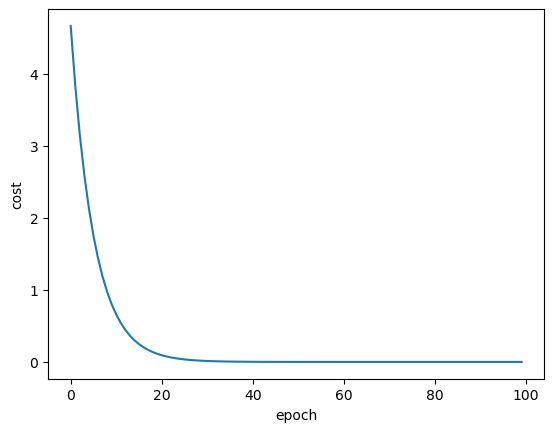

In [63]:
x_data = [1.0,2.0,3.0]
y_data = [2.0,4.0,6.0]
w = 1.0#猜测的初始权重w
print('Predict (before training)',4,forward(4))
for epoch in range(100):#训练100轮
    cost_val = cost(x_data,y_data)
    grad_val = gradient(x_data,y_data)
    w = w - 0.01*grad_val#学习率应取小 太大会导致失败
    print('Epoch',epoch,'w = ',w,'loss=',cost_val)
print('Predict (after training)',4,forward(4),w)
plt.plot(epoch_list,cost_list)
plt.ylabel('cost')
plt.xlabel('epoch')
plt.show() 

# 与梯度下降相对的有随机梯度下降用的更多
可能函数会带有鞍点

随机梯度下降不会使用所有样本 而是使用一个样本

在更新有可能会跨越鞍点 而不会停止迭代

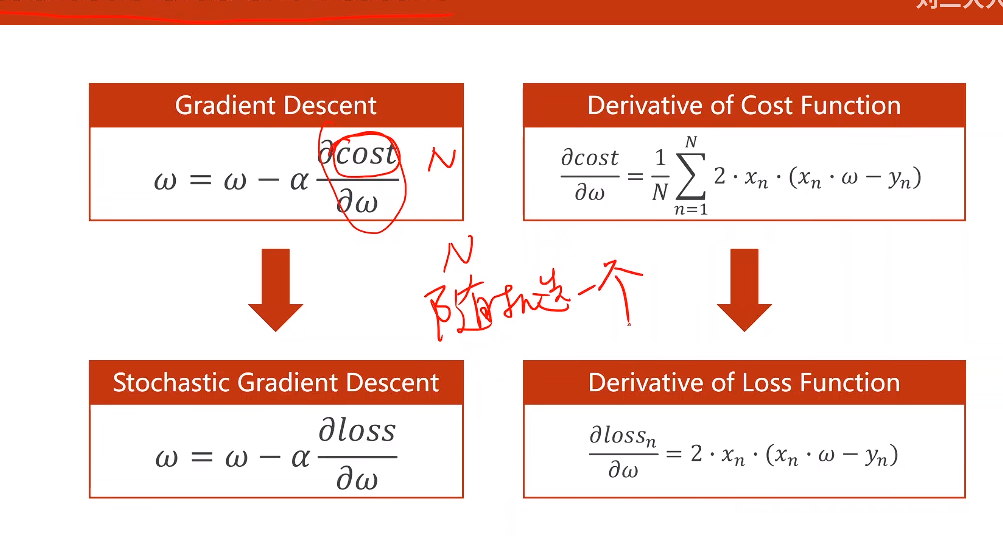

Predict (before training) 4 4.0
	grad 1.0 2.0 -2.0
	grad 2.0 4.0 -7.84
	grad 3.0 6.0 -16.2288
progress: 0 w =  1.260688 loss =  4.919240100095999
	grad 1.0 2.0 -1.478624
	grad 2.0 4.0 -5.796206079999999
	grad 3.0 6.0 -11.998146585599997
progress: 1 w =  1.453417766656 loss =  2.688769240265834
	grad 1.0 2.0 -1.093164466688
	grad 2.0 4.0 -4.285204709416961
	grad 3.0 6.0 -8.87037374849311
progress: 2 w =  1.5959051959019805 loss =  1.4696334962911515
	grad 1.0 2.0 -0.8081896081960389
	grad 2.0 4.0 -3.1681032641284723
	grad 3.0 6.0 -6.557973756745939
progress: 3 w =  1.701247862192685 loss =  0.8032755585999681
	grad 1.0 2.0 -0.59750427561463
	grad 2.0 4.0 -2.3422167604093502
	grad 3.0 6.0 -4.848388694047353
progress: 4 w =  1.7791289594933983 loss =  0.43905614881022015
	grad 1.0 2.0 -0.44174208101320334
	grad 2.0 4.0 -1.7316289575717576
	grad 3.0 6.0 -3.584471942173538
progress: 5 w =  1.836707389300983 loss =  0.2399802903801062
	grad 1.0 2.0 -0.3265852213980338
	grad 2.0 4.0 -1.280214

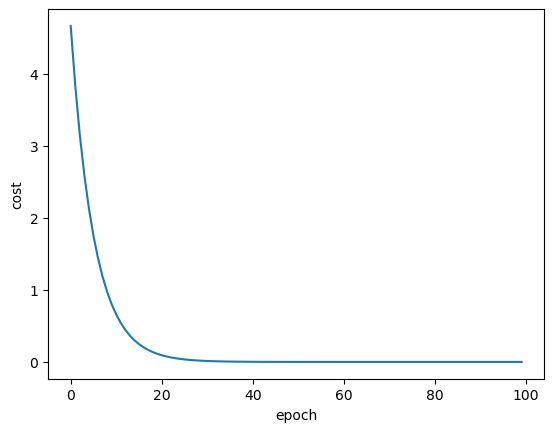

In [64]:
def forward(x):
    return x * w

def loss(x,y):
    y_pred = forward(x)
    return (y_pred - y)*(y_pred - y)

def gradient(x,y):
    return 2*x*(x*w - y)


x_data = [1.0,2.0,3.0]
y_data = [2.0,4.0,6.0]
w = 1.0#猜测的初始权重w
epoch_list = []
loss_list = []

print('Predict (before training)',4,forward(4))
for epoch in range(100):#训练100轮
    for x,y in zip(x_data,y_data):
        grad = gradient(x,y)
        w = w - 0.01*grad #对每一个样本之后都进行更新
        print("\tgrad",x,y,grad)
        l= loss(x,y)
    print("progress:",epoch,"w = ",w,"loss = ",l)
    epoch_list.append(epoch)
    loss_list.append(l)
print('Predict (after training)',4,forward(4),w)

plt.plot(epoch_list,cost_list)
plt.ylabel('cost')
plt.xlabel('epoch')
plt.show()